# Machine Learning - Random Forest (Floresta Aleatória)

#### Importação das bibliotecas necessárias

In [1]:
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Carregando a base de dados.

In [2]:
df_edu = pd.read_csv('xAPI-Edu-Data.csv')

In [3]:
df_edu.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


#### Verificando as distribuições de classes.

In [4]:
df_edu['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

#### Verificando os registros nulos

In [5]:
df_edu.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

#### Codificando os atributos numéricos.

In [6]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [7]:
Features = df_edu
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    label = LabelEncoder()
    Features[col] = label.fit_transform(Features[col])

In [8]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   gender                    480 non-null    int32
 1   NationalITy               480 non-null    int32
 2   PlaceofBirth              480 non-null    int32
 3   StageID                   480 non-null    int32
 4   GradeID                   480 non-null    int32
 5   SectionID                 480 non-null    int32
 6   Topic                     480 non-null    int32
 7   Semester                  480 non-null    int32
 8   Relation                  480 non-null    int32
 9   raisedhands               480 non-null    int64
 10  VisITedResources          480 non-null    int64
 11  AnnouncementsView         480 non-null    int64
 12  Discussion                480 non-null    int64
 13  ParentAnsweringSurvey     480 non-null    int32
 14  ParentschoolSatisfaction  480 non-null    

In [9]:
Features.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


#### Dividindo os dados em treino e teste

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df_edu.drop('Class',axis=1),df_edu['Class'],test_size=0.3,random_state=0)

#### Verificando a forma dos dados

In [12]:
X_train.shape,X_test.shape

((336, 16), (144, 16))

In [13]:
y_train.shape,y_test.shape

((336,), (144,))

#### Instânciando o objeto classificador

In [14]:
random_clf = RandomForestClassifier()

#### Parâmetros do  objeto RandomForestClassifier
* <span style="color:red">n_estimators: número de árvores que serão criadas na floresta.</span>
* <span style="color:red"> bootstrap: se será considerado o bootstrap dataset durante a criação das árvores.</span>
* <span style="color:red"> max_features: número total de features que as árvores serão criadas.</span>
* criterion: medida de qualidade da divisão.
* splitter: estratégia utilizada para dividir o nó de decisão.
* max_depth: profundidade máxima da árvore.
* min_samples_split: número de amostras mínimas para considerar um nó para divisão.
* min_samples_leaf: número de amostras mínimas no nível folha.

#### Treinando o modelo Random Forest

In [15]:
random_clf.fit(X_train,y_train)

RandomForestClassifier()

#### Predizendo as classes a partir do modelo treinado utilizando o conjunto de teste

In [16]:
resultado = random_clf.predict(X_test)

In [17]:
resultado

array([2, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1, 0,
       2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0,
       2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 2,
       1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 2, 0, 1, 0, 1, 2,
       1, 2, 1, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0])

#### Métricas de Validação

In [18]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74        39
           1       0.79      0.91      0.85        34
           2       0.79      0.76      0.78        71

    accuracy                           0.78       144
   macro avg       0.78      0.80      0.79       144
weighted avg       0.78      0.78      0.78       144



#### Verificando as features mais importantes para o modelo treinado

In [19]:
random_clf.feature_importances_

array([0.0235346 , 0.03359049, 0.03747478, 0.01828918, 0.03646193,
       0.02108017, 0.04166008, 0.00974824, 0.04732599, 0.14596164,
       0.17121836, 0.13288822, 0.09627126, 0.03145807, 0.02407587,
       0.12896111])

In [20]:
feature_imp = pd.Series(random_clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

In [21]:
feature_imp

VisITedResources            0.171218
raisedhands                 0.145962
AnnouncementsView           0.132888
StudentAbsenceDays          0.128961
Discussion                  0.096271
Relation                    0.047326
Topic                       0.041660
PlaceofBirth                0.037475
GradeID                     0.036462
NationalITy                 0.033590
ParentAnsweringSurvey       0.031458
ParentschoolSatisfaction    0.024076
gender                      0.023535
SectionID                   0.021080
StageID                     0.018289
Semester                    0.009748
dtype: float64

#### Features mais importantes de forma gráfica

In [22]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()

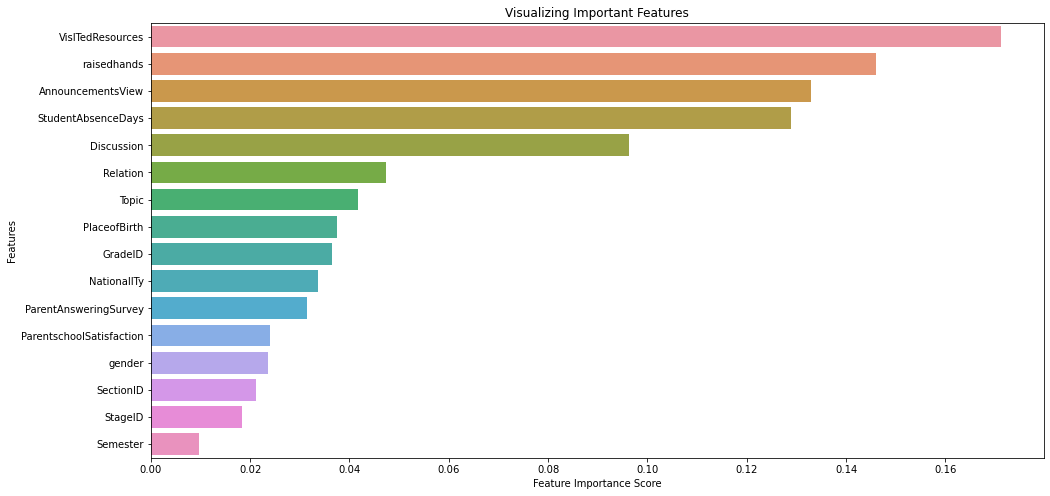

In [23]:
visualiza_features_importantes(feature_imp)

#### Selecionando apenas as features com importancia acima de um determinado score.

In [24]:
features_selecionadas = []
for feature,importancia in feature_imp.iteritems():
    if importancia > 0.03:
        print("{}:\t{}".format(feature, importancia))
        features_selecionadas.append(feature)

VisITedResources:	0.17121836467820756
raisedhands:	0.14596164017093782
AnnouncementsView:	0.13288821945195367
StudentAbsenceDays:	0.12896110547603698
Discussion:	0.09627126222551863
Relation:	0.047325988007942604
Topic:	0.04166007520466273
PlaceofBirth:	0.037474779015423135
GradeID:	0.036461931380832695
NationalITy:	0.03359048654369133
ParentAnsweringSurvey:	0.031458072172873074


#### Separando os dados em treino e teste utilizando apenas as features selecionadas

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    df_edu[features_selecionadas],
    df_edu['Class'],
    test_size=0.3,
    random_state=0
)

#### Verificando a nova forma dos dados

In [26]:
X_train.shape,X_test.shape

((336, 11), (144, 11))

In [27]:
y_train.shape,y_test.shape

((336,), (144,))

#### Instânciando o objeto classificador

In [28]:
random_clf = RandomForestClassifier(random_state=0)

#### Treinando novamente o modelo Random Forest

In [29]:
random_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

#### Executando o algoritmo de arvore de decisão com o conjunto de teste

In [30]:
resultado = random_clf.predict(X_test)
resultado

array([2, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 1, 2, 0, 0, 1, 1, 0, 1, 0,
       2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0,
       2, 2, 0, 2, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 2,
       1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 2, 2, 1, 1, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 1, 2, 0, 1, 0, 1, 2,
       1, 2, 1, 1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0])

#### Métricas de Validação

In [31]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71        39
           1       0.80      0.94      0.86        34
           2       0.81      0.73      0.77        71

    accuracy                           0.78       144
   macro avg       0.77      0.80      0.78       144
weighted avg       0.78      0.78      0.78       144



## Explorando as árvores da Floresta gerada

In [32]:
print("Número de árvores da floresta: {}".format(len(random_clf.estimators_)))
print("Árvores floresta gerada:")
for tree in random_clf.estimators_:
    print("\nNumero de nós: {}".format(tree.tree_.node_count))
    print("Profundidade da árvore: {}".format(tree.tree_.max_depth))
    print("Features importantes: {}".format(tree.feature_importances_))
    print("\nObjeto: {}".format(tree))


Número de árvores da floresta: 100
Árvores floresta gerada:

Numero de nós: 131
Profundidade da árvore: 12
Features importantes: [0.28962813 0.11250638 0.09346194 0.09615368 0.05063318 0.11918328
 0.00352534 0.03557331 0.03297889 0.10761879 0.05873709]

Objeto: DecisionTreeClassifier(max_features='sqrt', random_state=209652396)

Numero de nós: 145
Profundidade da árvore: 13
Features importantes: [0.1724185  0.13295587 0.1080073  0.09181232 0.1030939  0.08883726
 0.0578725  0.05268703 0.04006761 0.04886957 0.10337816]

Objeto: DecisionTreeClassifier(max_features='sqrt', random_state=398764591)

Numero de nós: 143
Profundidade da árvore: 12
Features importantes: [0.04435505 0.17955868 0.28589515 0.17732037 0.06811597 0.01613791
 0.06345934 0.02605375 0.03972879 0.02961731 0.06975768]

Objeto: DecisionTreeClassifier(max_features='sqrt', random_state=924231285)

Numero de nós: 153
Profundidade da árvore: 13
Features importantes: [0.08214048 0.16006044 0.13548986 0.16953514 0.17942157 0.109

#### Selecionando uma árvore da floresta

In [33]:
tree0 = random_clf.estimators_[0]

In [35]:
tree0

DecisionTreeClassifier(max_features='sqrt', random_state=209652396)

#### Visualizando de forma gráfica

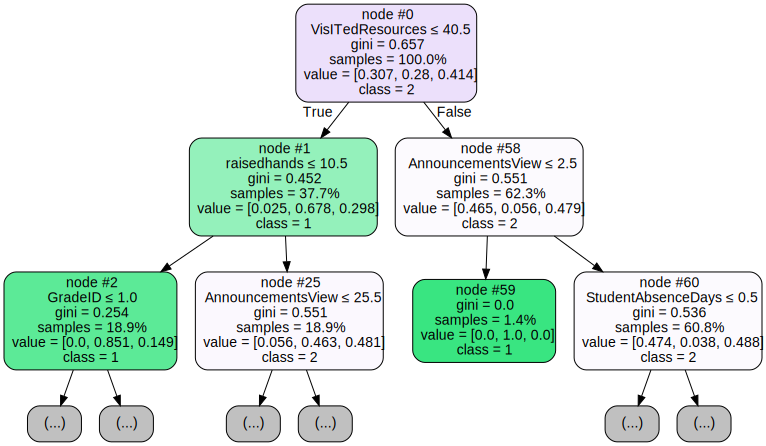

In [34]:
from sklearn.tree import export_graphviz
import graphviz 

dot_data = export_graphviz(
         tree0,
         max_depth=2,
         out_file=None,
         feature_names=X_train.columns,
         class_names=['0','1','2'], 
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

#### Selecionando outra árvore da floresta

In [36]:
tree1 = random_clf.estimators_[1]

#### Visualizando de forma gráfica

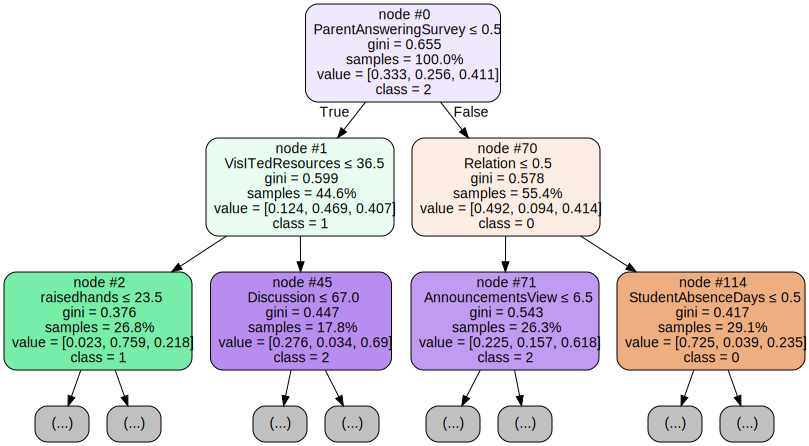

In [37]:
dot_data = export_graphviz(
         tree1,
         max_depth=2,
         out_file=None,
         feature_names=X_train.columns,
         class_names=['0','1','2'], 
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph